In [1]:
from plotting import data_plot
import numpy as np
import h5py
from utils.fastMRI_utils import fft, ifft
import matplotlib.pyplot as plt
hf = h5py.File(r'D:\fastMRI_DATA\singlecoil_train\file1000001.h5','r')
kspace_raw = hf['kspace'][18]

In [2]:
def for_disp(compl):
    out = np.zeros((*compl.shape,2),np.float)
    out[:,:,0] = np.abs(compl)
    out[:,:,1] = np.angle(compl)
    return out

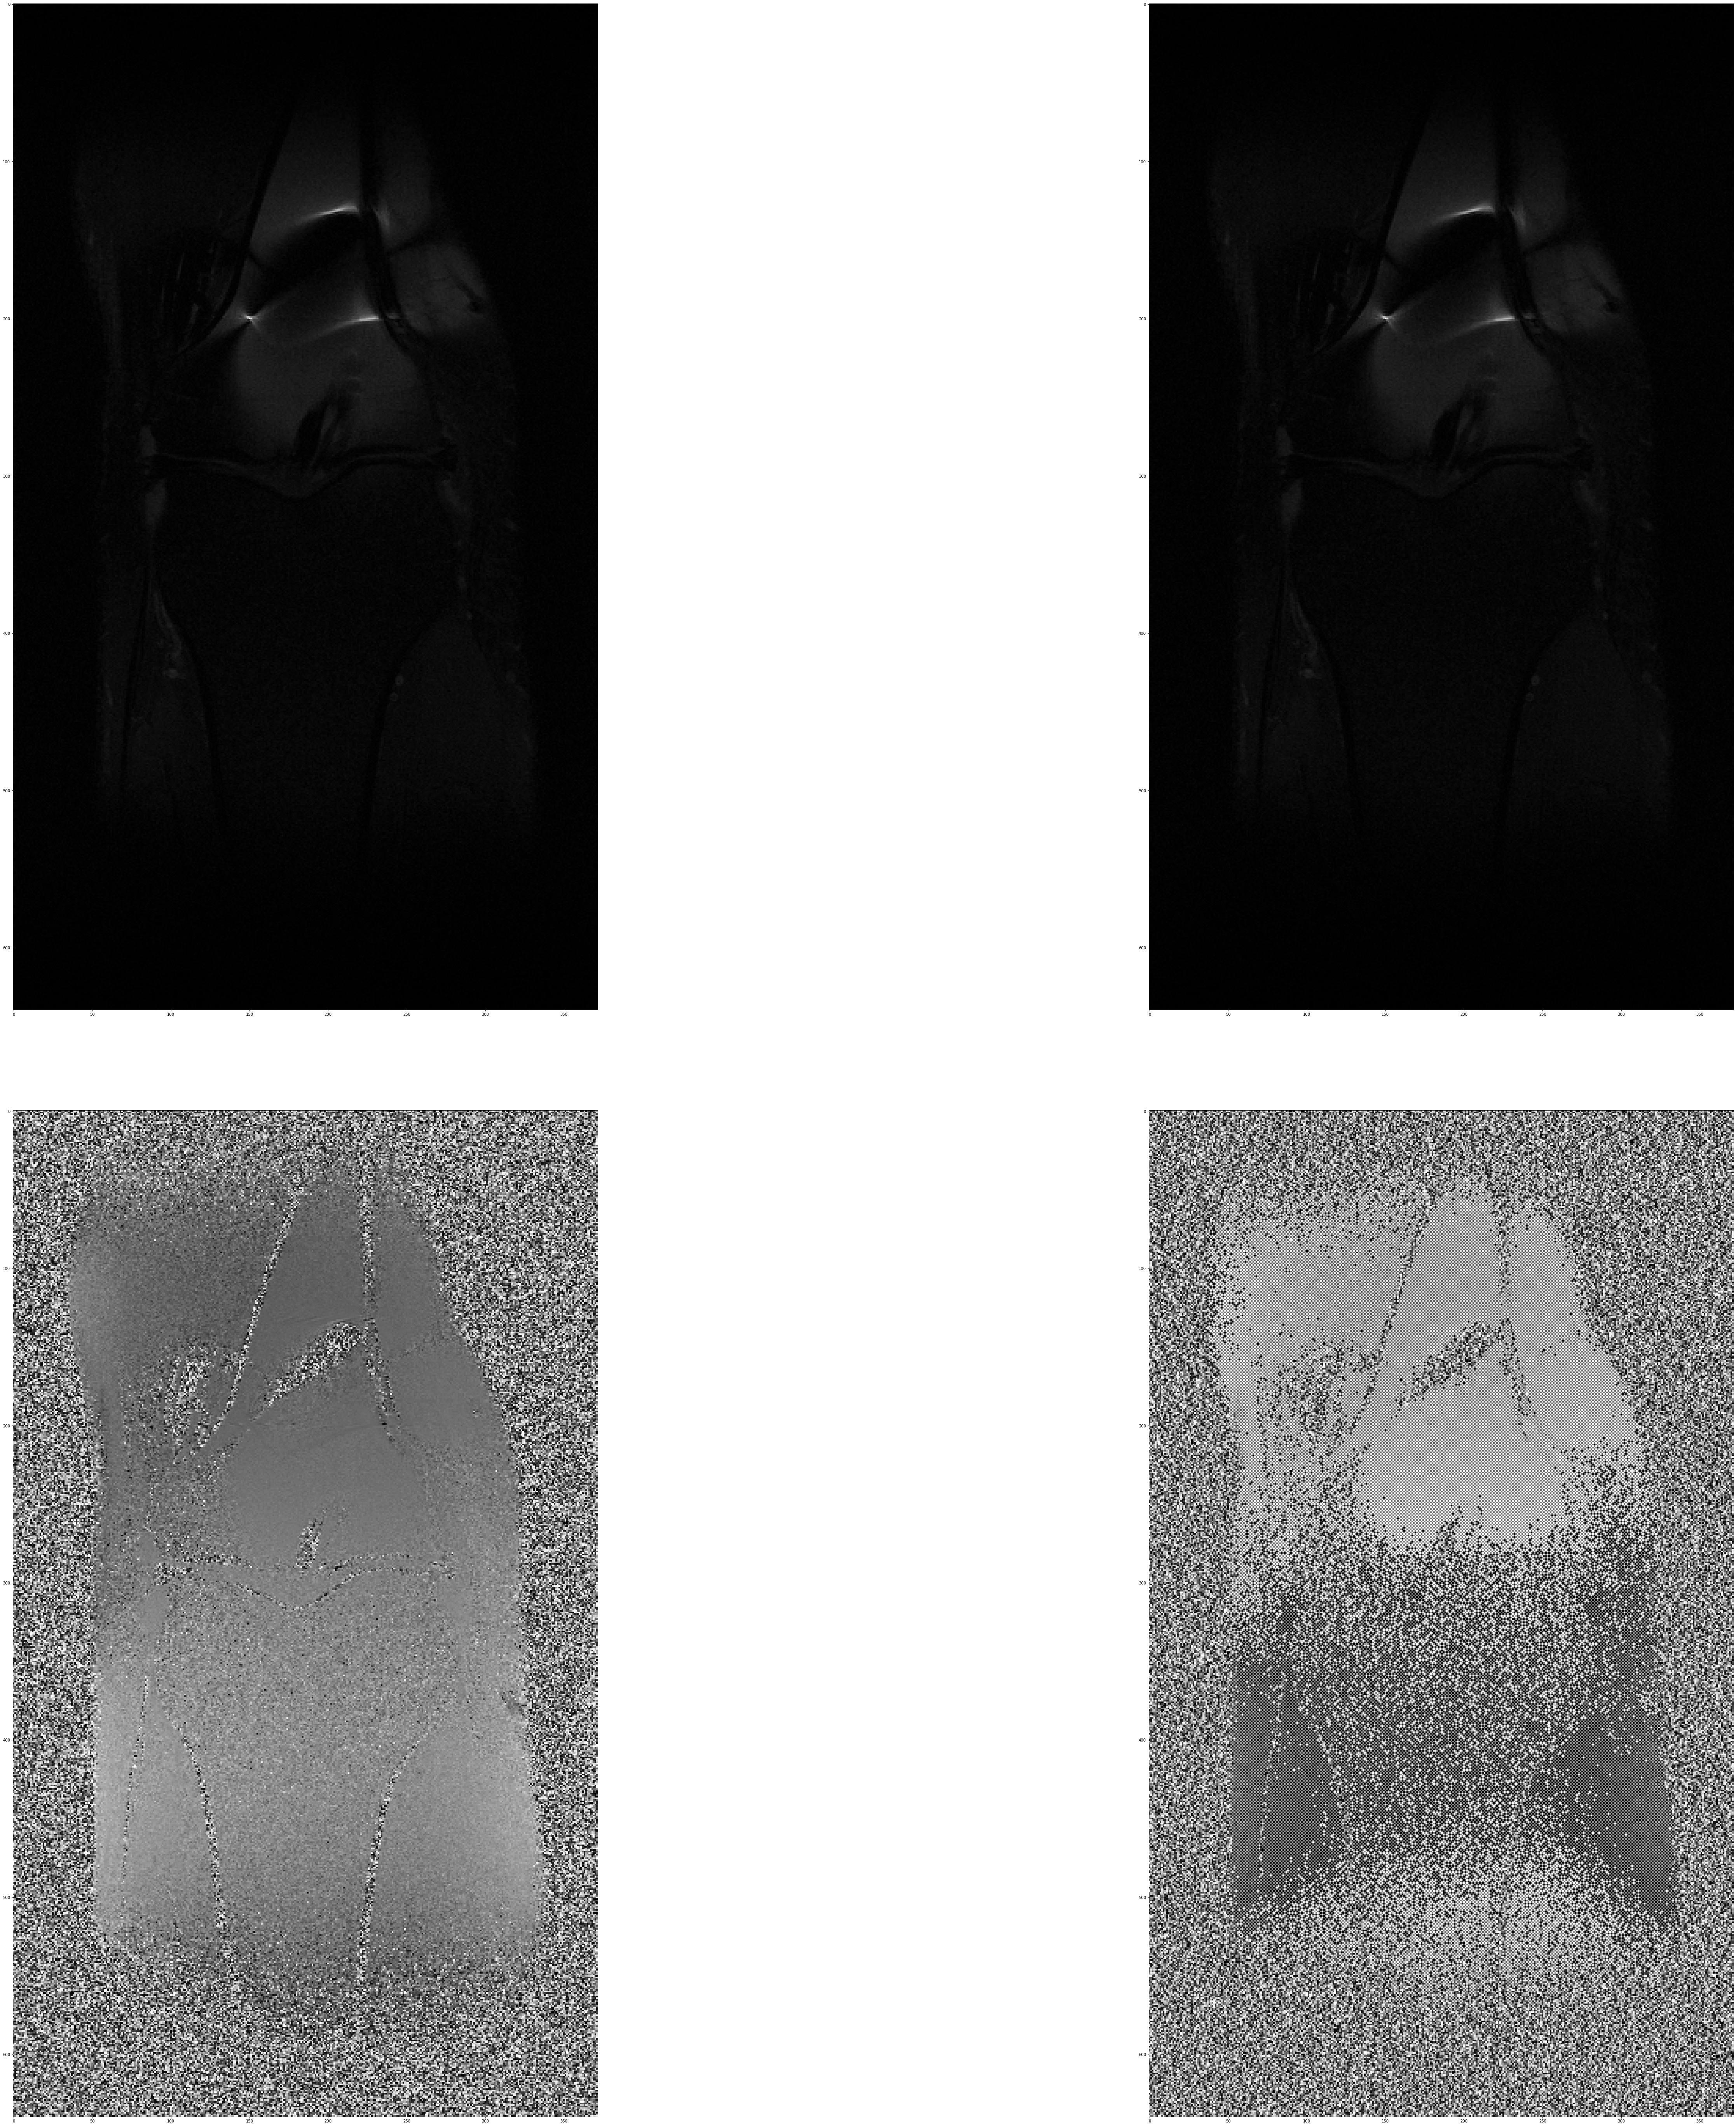

In [3]:
###check how to get image back
#image:
image = ifft(kspace_raw)
#my way:
my_reimage = ifft(fft(image))
#loic's way:
loics_reimage = np.fft.ifft2(np.fft.fftshift(np.fft.fft2(image)))
#display:
my_reimage_disp = for_disp(my_reimage)
loics_reimage_disp = for_disp(loics_reimage)
data_plot([my_reimage_disp,loics_reimage_disp,my_reimage_disp],save_path='fftshift_comparison')
myline = my_reimage_disp[400,:,1]
loicline = loic_reimage_disp[400,:,1]
